
# Dataset: House Prices – Técnicas Avanzadas de Regresión

---

## Objetivo principal  
- Predecir el precio de venta (`SalePrice`) de viviendas ubicadas en Ames, Iowa (EE. UU.).  
- Método: emplear modelos de regresión múltiple u otros algoritmos de aprendizaje automático, utilizando como entrada una amplia gama de características de la propiedad: desde su tamaño y materiales hasta su ubicación y estado general.

---

## Etapas clave para alcanzar el objetivo

1. **Entender el problema**  
   - Variable objetivo: `SalePrice`.  
   - Predictores: atributos físicos, geográficos, constructivos y contextuales de la vivienda.

2. **Análisis exploratorio de datos (EDA)**  
   - Inspeccionar la estructura del conjunto de datos: tipos de variables, valores faltantes, duplicados.  
   - Analizar distribuciones, tendencias y relaciones entre variables mediante estadísticas resumen y visualizaciones.

3. **Preprocesamiento y limpieza**  
   - Manejar datos faltantes: imputación o eliminación según el contexto.  
   - Detectar y tratar valores atípicos que puedan distorsionar el modelo.  
   - Consolidar categorías poco representadas en variables categóricas.

4. **Transformación de variables categóricas**  
   - Aplicar técnicas como *Label Encoding* o *One-Hot Encoding* según la naturaleza de la variable y el modelo a usar.

5. **Normalización o estandarización**  
   - Escalar variables numéricas cuando sea necesario, especialmente para algoritmos sensibles a la magnitud de los datos (como regresión con regularización o redes neuronales).

6. **Selección de características relevantes**  
   - Identificar las variables más influyentes mediante correlaciones, pruebas estadísticas (como ANOVA) o métodos automáticos de selección de rasgos.

7. **Desarrollo del modelo predictivo**  
   - Comenzar con un modelo base como la Regresión Lineal Múltiple, y luego explorar alternativas más sofisticadas si es necesario (árboles, ensambles, etc.).

8. **Evaluación del rendimiento**  
   - RMSE (Raíz del Error Cuadrático Medio): penaliza errores grandes y mide la magnitud promedio del error.  
   - MAE (Error Absoluto Medio): promedio de los errores absolutos, más robusto a valores extremos.  
   - R² (Coeficiente de determinación): proporción de la varianza en `SalePrice` explicada por el modelo (rango: 0 a 1).  
   - Validación cruzada: asegura que el desempeño del modelo sea consistente y no dependa de una partición específica de los datos.

9. **Interpretación e insights**  
   - Determinar qué factores (por ejemplo, calidad general, área habitable, barrio) tienen mayor impacto en el precio final.  
   - Comunicar hallazgos de forma clara para apoyar decisiones inmobiliarias o comerciales.

---

## Principales variables del conjunto de datos  
El dataset incluye 79 características que describen distintos aspectos de las viviendas. Algunas de las más relevantes son:

- **Características del terreno**  
  - `MSSubClass`: clasificación de la vivienda (unifamiliar, dúplex, PUD, etc.).  
  - `MSZoning`: tipo de zonificación (residencial, comercial, agrícola).  
  - `LotFrontage`: longitud de la fachada del terreno.  
  - `LotArea`: superficie total del lote.  
  - `LotShape`: forma del terreno (regular o irregular).  
  - `LandContour`: relieve del terreno (plano, inclinado, en depresión).  
  - `Neighborhood`: nombre del vecindario o barrio.

- **Atributos constructivos**  
  - `BldgType`: tipo de edificación.  
  - `HouseStyle`: estilo arquitectónico (1 piso, 2 pisos, split-level, etc.).  
  - `OverallQual` / `OverallCond`: calificaciones de calidad y estado general (escala de 1 a 10).  
  - `YearBuilt` / `YearRemodAdd`: año de construcción y de última remodelación.  
  - `RoofStyle` y `RoofMatl`: diseño y material del techo.  
  - `Exterior1st` / `Exterior2nd`: materiales exteriores principales y secundarios.

- **Sótano**  
  - `BsmtQual`, `BsmtCond`: calidad y condición del sótano.  
  - `BsmtExposure`: nivel de exposición (con o sin ventanas, acceso al exterior).  
  - `TotalBsmtSF`: superficie total del sótano en pies cuadrados.

- **Espacios habitables**  
  - `GrLivArea`: área habitable sobre el nivel del suelo.  
  - `FullBath`, `HalfBath`: cantidad de baños completos y medios.  
  - `BedroomAbvGr`, `KitchenAbvGr`: dormitorios y cocinas en niveles superiores.  
  - `TotRmsAbvGrd`: número total de habitaciones sobre el suelo.

- **Elementos adicionales**  
  - `Fireplaces` y `FireplaceQu`: número y calidad de chimeneas.  
  - `GarageType`, `GarageCars`, `GarageArea`: tipo, capacidad y tamaño del garaje.  
  - Áreas exteriores: `WoodDeckSF`, `OpenPorchSF`, `PoolArea`, `Fence`.

- **Detalles de la transacción**  
  - `MoSold`, `YrSold`: mes y año de la venta.  
  - `SaleType`: modalidad de venta (convencional, efectivo, financiamiento gubernamental, etc.).  
  - `SaleCondition`: circunstancias de la venta (normal, herencia, venta parcial, etc.).

- **Variable objetivo**  
  - `SalePrice`: precio final de venta en dólares (la variable que se busca predecir).

---

## Conclusión  
Este conjunto de datos está diseñado para modelar y predecir el valor de mercado de viviendas a partir de una rica combinación de factores físicos, de ubicación, de calidad y contextuales. Su complejidad lo convierte en un excelente banco de pruebas para técnicas avanzadas de regresión y preparación de datos en el ámbito del aprendizaje automático.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

X_train = train.drop(columns=["SalePrice"])
y_train = train["SalePrice"]

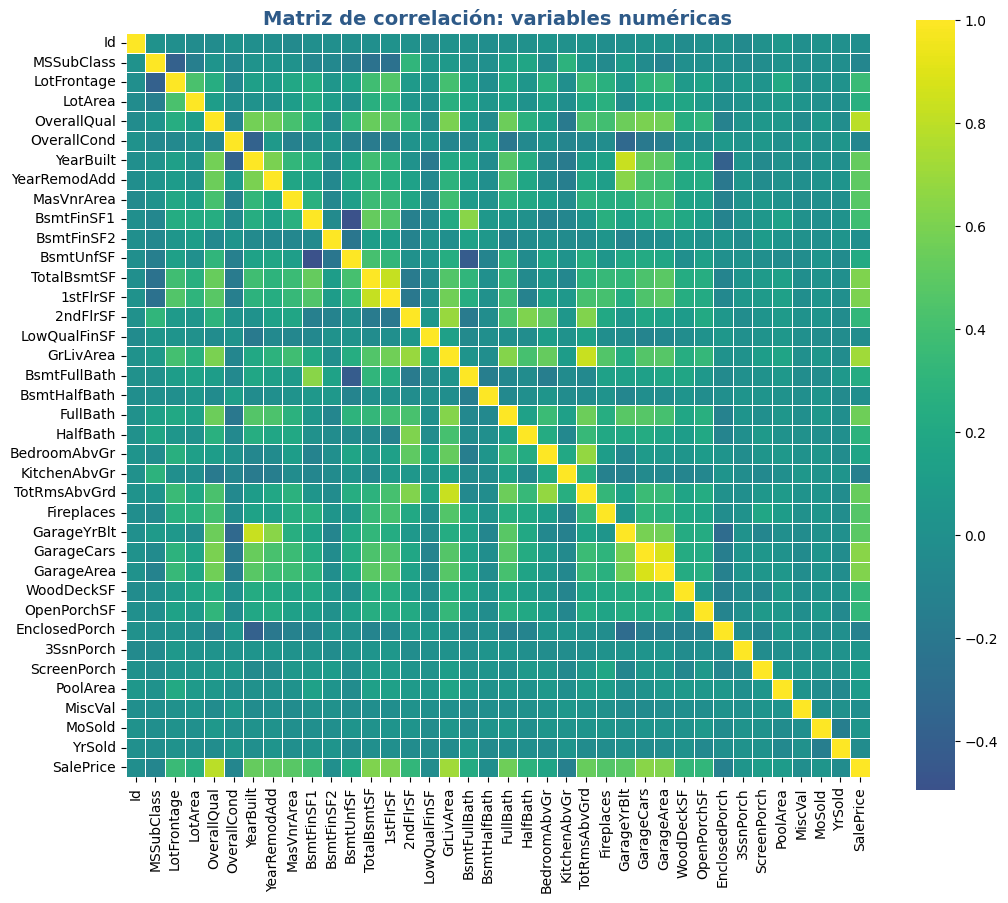

Información general del conjunto de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  O

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = train.select_dtypes(include=["number"])
correlaciones = num_cols.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlaciones, cmap="viridis", center=0, square=True, linewidths=0.5)
plt.title("Matriz de correlación: variables numéricas", fontsize=14, fontweight="bold", color="#2E5A88")
plt.show()

print("Información general del conjunto de entrenamiento:")
print(X_train.info())

print("\nEstadísticas descriptivas:")
print(X_train.describe())

print("\nTop 5 columnas con más valores faltantes (train):")
print(X_train.isna().sum().sort_values(ascending=False).head())

print("\nTop 5 columnas con más valores faltantes (test):")
print(test.isna().sum().sort_values(ascending=False).head())

In [ ]:
umbral_nulos = 0.3 * len(X_train)
cols_a_borrar = X_train.columns[X_train.isnull().sum() > umbral_nulos].tolist()

X_train = X_train.drop(cols_a_borrar, axis=1)
test = test.drop([col for col in cols_a_borrar if col in test.columns], axis=1)

cols_numericas = X_train.select_dtypes(include='number').columns
for col in cols_numericas:
    med = X_train[col].median()
    X_train[col].fillna(med, inplace=True)
    if col in test.columns:
        test[col].fillna(med, inplace=True)

cols_categoricas = X_train.select_dtypes(include='object').columns
for col in cols_categoricas:
    X_train[col].fillna('Ninguno', inplace=True)
    if col in test.columns:
        test[col].fillna('Ninguno', inplace=True)

train = train[train['GrLivArea'] < 4000]
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']

C:\Users\USER\AppData\Local\Temp\ipykernel_12820\357362956.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[c].fillna(mediana, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_12820\357362956.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [7]:
for df in [X_train, test]:
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df['Antiguedad'] = df['YrSold'] - df['YearBuilt']
    df['AntiguedadRemodel'] = df['YrSold'] - df['YearRemodAdd']
    df['GaragePresente'] = (df['GarageArea'] > 0).astype(int)

y_train = np.log1p(y_train)

In [8]:
todos_datos = pd.concat([X_train, test], axis=0)
datos_dummies = pd.get_dummies(todos_datos, drop_first=True)

X_train_final = datos_dummies.iloc[:X_train.shape[0]]
X_test_final = datos_dummies.iloc[X_train.shape[0]:]

In [9]:
escalar = StandardScaler()
X_train_norm = escalar.fit_transform(X_train_final)
X_test_norm = escalar.transform(X_test_final)

imputar = SimpleImputer(strategy='median')
X_train_norm = imputar.fit_transform(X_train_norm)
X_test_norm = imputar.transform(X_test_norm)

seleccion = SelectKBest(score_func=f_regression, k=150)
X_train_sel = seleccion.fit_transform(X_train_norm, y_train)
X_test_sel = seleccion.transform(X_test_norm)

cols_seleccionadas = X_train_final.columns[seleccion.get_support()]

In [10]:
reg = Ridge(alpha=8)
reg.fit(X_train_sel, y_train)

y_pred_train = reg.predict(X_train_sel)

rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

cv_r2 = cross_val_score(reg, X_train_sel, y_train, cv=4, scoring='r2')

print("RMSE:", round(rmse, 2))
print("MAE:", round(mae, 2))
print("R²:", round(r2, 4))

RMSE: 0.1
MAE: 0.07
R²: 0.9354


In [17]:

todo = pd.concat([X_train, test], axis=0)
dummies = pd.get_dummies(todo, drop_first=True)

X_train_encoded = dummies.iloc[:len(X_train)]
X_test_encoded = dummies.iloc[len(X_train):]

escala = StandardScaler()
X_train_scaled = escala.fit_transform(X_train_encoded)
X_test_scaled = escala.transform(X_test_encoded)

rellena = SimpleImputer(strategy='median')
X_train_scaled = rellena.fit_transform(X_train_scaled)
X_test_scaled = rellena.transform(X_test_scaled)

seleccion = SelectKBest(score_func=f_regression, k=150)
X_train_selected = seleccion.fit_transform(X_train_scaled, y_train)
X_test_selected = seleccion.transform(X_test_scaled)

features_ok = X_train_encoded.columns[seleccion.get_support()]

                  Feature  Coefficient
34            MSZoning_RL     0.116971
35            MSZoning_RM     0.090089
3             OverallQual     0.067681
12              GrLivArea     0.065376
32            MSZoning_FV     0.060876
28                TotalSF     0.038989
33            MSZoning_RH     0.031815
45   Neighborhood_Crawfor     0.031642
127     GarageType_Attchd     0.029751
148  SaleCondition_Normal     0.029240


C:\Users\USER\AppData\Local\Temp\ipykernel_12820\3271545130.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


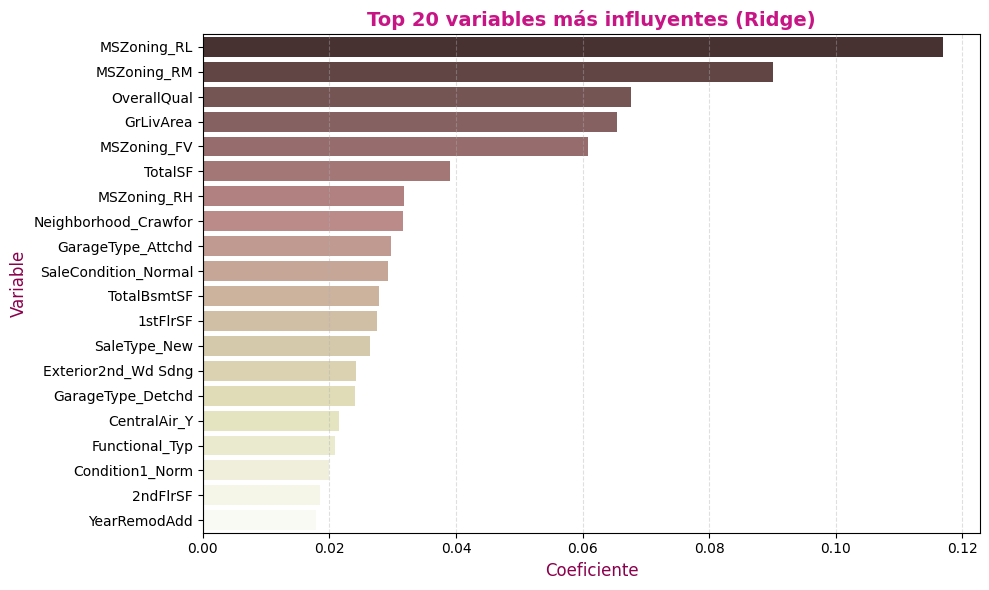

In [23]:
modelo = Ridge(alpha=8)
modelo.fit(X_train_selected, y_train)

coef_df = pd.DataFrame({
    'Feature': features_ok,
    'Coefficient': modelo.coef_
}).sort_values('Coefficient', ascending=False)

print(coef_df.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=coef_df.head(20),
    palette='pink'
)
plt.title('Top 20 variables más influyentes (Ridge)', fontsize=14, fontweight='bold', color='#C71585')
plt.xlabel('Coeficiente', fontsize=12, color='#8B004D')
plt.ylabel('Variable', fontsize=12, color='#8B004D')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [32]:
predicciones_finales = np.expm1(modelo.predict(X_test_sel))

resultado = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": predicciones_finales
})

resultado.to_csv("resultado_final.csv", index=False)

print("El archivo 'resultado_final.csv' se generó correctamente")


El archivo 'resultado_final.csv' se generó correctamente


# Kaggle

## Puntaje :p

![Puntajes Kaggle](resultado.png)

---

## Ranking :p

![Posición Kaggle](leaderboard.png)